In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

# Clean & prepare dataset

#### Load dataset from kaggle ()

In [3]:
food = pd.read_csv('dataset/RAW_recipes.csv')

In [4]:
food.head(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6


#### Check data types and null values

In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [6]:
# check for null values
food.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [7]:
# drop one row where name is empty
ind_missing_name = food.index[food['name'].isna()]
food.drop(ind_missing_name, inplace=True)
food.shape

(231636, 12)

In [8]:
# check the format of ingredients, steps and description 
food['ingredients'].iloc[0], type(food['ingredients'].iloc[0]), \
food['steps'].iloc[0], type(food['steps'].iloc[0]), \
food['description'].iloc[0], type(food['description'].iloc[0]), 

("['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",
 str,
 "['make a choice and proceed with recipe', 'depending on size of squash , cut into half or fourths', 'remove seeds', 'for spicy squash , drizzle olive oil or melted butter over each cut squash piece', 'season with mexican seasoning mix ii', 'for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece', 'season with sweet mexican spice mix', 'bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin', 'be careful not to burn the squash especially if you opt to use sugar or butter', 'if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking', 'if desired , season with salt']",
 str,
 'autumn is my favorite time of year to cook! this recipe \r\ncan be prepared either spicy or sweet, your choice!\r\ntwo of my posted mexican-inspired sea

- the ingredients and steps entries should be converted to a list of strings to have better handling downstream

## Create cleaned dataframe for further anaylsis

1. Convert ingredient strings and steps strings to list with entries
2. Add source of data
3. Drop id, submitted and description features

In [9]:
def convert_to_list(string):
    return ast.literal_eval(string)


def prepare_dataset(base_df, data_source, add_combined=False):
    df = pd.DataFrame([], columns=['source', 'title', 'contributor_id', 'tags', 'nutrition',
                                   'ingredients', 'num_ingredients', 'instructions', 
                                   'num_instruction_steps', 'prep_time_minutes'])
    
    df['title'] = base_df['name']
    df['ingredients'] = [convert_to_list(i) for i in base_df['ingredients']]
    df['instructions'] = [convert_to_list(s) for s in base_df['steps']]
    df['num_ingredients'] = base_df['n_ingredients']
    df['num_instruction_steps'] = base_df['n_steps']
    df['prep_time_minutes'] = base_df['minutes']
    df['contributor_id'] = base_df['contributor_id'].astype(str)
    df['tags'] = base_df['tags']
    df['nutrition'] = base_df['nutrition']
    df['source'] = data_source

    
    return df

In [10]:
df = prepare_dataset(food, 'food.com')

In [11]:
df.head(3)

,source,title,contributor_id,tags,nutrition,ingredients,num_ingredients,instructions,num_instruction_steps,prep_time_minutes
0,food.com,arriba baked winter squash mexican style,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","[winter squash, mexican seasoning, mixed spice...",7,"[make a choice and proceed with recipe, depend...",11,55
1,food.com,a bit different breakfast pizza,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","[prepared pizza crust, sausage patty, eggs, mi...",6,"[preheat oven to 425 degrees f, press dough in...",9,30
2,food.com,all in the kitchen chili,196586,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","[ground beef, yellow onions, diced tomatoes, t...",13,"[brown ground beef in large pot, add chopped o...",6,130


# EDA

## Numerical Features

In [12]:
df.describe()

,num_ingredients,num_instruction_steps,prep_time_minutes
count,231636.000000,231636.000000,2.316360e+05
mean,9.051149,9.765516,9.398587e+03
std,3.734803,5.995136,4.461973e+06
min,1.000000,0.000000,0.000000e+00
25%,6.000000,6.000000,2.000000e+01
50%,9.000000,9.000000,4.000000e+01
75%,11.000000,12.000000,6.500000e+01
max,43.000000,145.000000,2.147484e+09


Observations:
- from the five point summary on we see that there are outliers in dataset in regards to all three features: number of ingredients, number of instruction steps and also preparation time in minutes
- this is apparent from the max vs 75% summary

### Checking for outliers and data shape

In [13]:
# check extreme outliers in prep_time_minutes
df.sort_values(by='prep_time_minutes', ascending=False).head(5)

,source,title,contributor_id,tags,nutrition,ingredients,num_ingredients,instructions,num_instruction_steps,prep_time_minutes
144074,food.com,no bake granola balls,464080,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]","[rolled oats, unsweetened dried shredded cocon...",8,"[preheat the oven to 350 degrees, spread oats ...",9,2147483647
109624,food.com,how to preserve a husband,576273,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]","[cream, peach]",2,"[be careful in your selection, don't choose to...",9,1051200
106563,food.com,homemade fruit liquers,553251,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]","[berries, vodka, granulated sugar]",3,"[rinse the fruit or berries , fruit must be cu...",12,288000
38116,food.com,celtic druid s honey mead meade metheglin,242729,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]","[gingerroot, lemons, juice and rind of, whole ...",7,"[equipement:, very large pan - to hold 12 pint...",18,259260
106963,food.com,homemade vanilla,28177,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[vanilla beans, vodka]",2,[slice the vanilla beans length-wise and scrap...,9,259205


- the first two rows are very different compared to the other values
- also the second one looks like spam

In [14]:
# drop these two rows from df
print(df.shape)
df.drop(index=[144074, 109624], inplace=True)
print(df.shape)

(231636, 10)
(231634, 10)


### Plot numerical features

### Univariate 

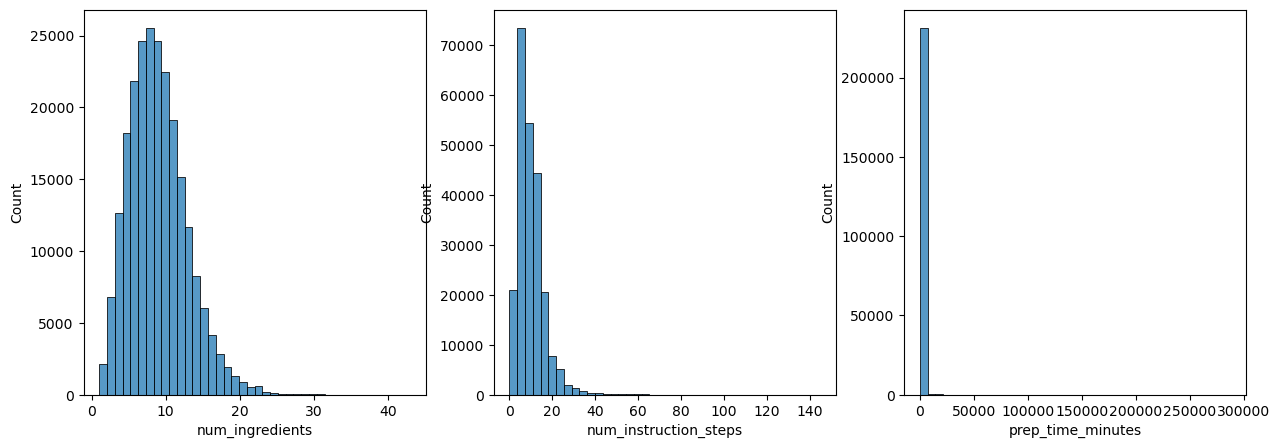

In [15]:
# check for number of ingredients, number of instruction steps, and number of prep time 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
for i, col in enumerate(df.select_dtypes('number')):
    sns.histplot(data=df, x=col, bins=40, ax=ax[i])

plt.show()

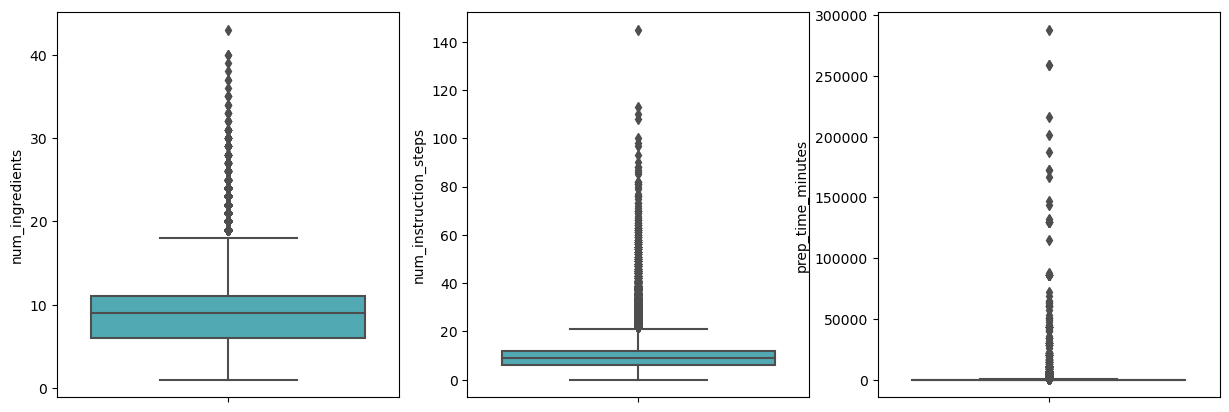

In [16]:
# visual check for outliers
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
for i, col in enumerate(df.select_dtypes('number')):
    sns.boxplot(data=df, y=col, ax=ax[i], palette='YlGnBu')

plt.show()

### Bivariate

In [17]:
df.corr()

,num_ingredients,num_instruction_steps,prep_time_minutes
num_ingredients,1.000000,0.427708,-0.012103
num_instruction_steps,0.427708,1.000000,0.018180
prep_time_minutes,-0.012103,0.018180,1.000000


Obsertations:
- correlation between prep time and number of igredients is very close to zero:
    - this implies that there is either no menaingfull correlation or the relationship is complex (non linear)
- we see positive correlation above 0.4 between prep time and number of ingredients

- num ingredients and num of instruction steps are nomrally distributed and skewed to the right
- prep time has large outliers

### Create categories for prep times to evaluate the features more conveniently

In [18]:
# create fn to sort prep times into categories of short, medium, long, extra long
def create_prep_time_categories():
    df['prep_time_category'] = 'short'
    df.loc[df['prep_time_minutes'] > 15, 'prep_time_category'] = 'medium'
    df.loc[df['prep_time_minutes'] > 45, 'prep_time_category'] = 'long'
    df.loc[df['prep_time_minutes'] > 180, 'prep_time_category'] = 'extra_long'

In [19]:
create_prep_time_categories()

In [20]:
df.head(2)

,source,title,contributor_id,tags,nutrition,ingredients,num_ingredients,instructions,num_instruction_steps,prep_time_minutes,prep_time_category
0,food.com,arriba baked winter squash mexican style,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","[winter squash, mexican seasoning, mixed spice...",7,"[make a choice and proceed with recipe, depend...",11,55,long
1,food.com,a bit different breakfast pizza,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","[prepared pizza crust, sausage patty, eggs, mi...",6,"[preheat oven to 425 degrees f, press dough in...",9,30,medium


In [21]:
# fn to plot prep time categories
def show_recipes_per_preptime_category():
    category_order = ["short", "medium", "long", "extra_long"]
    sns.countplot(x=df['prep_time_category'], order=category_order, palette="YlGnBu")
    plt.xlabel("Prep time category")
    plt.ylabel("Count")
    plt.title("Number of recipes per prep time category")

    counts = df['prep_time_category'].value_counts()

    for i, v in enumerate(category_order):
        val = df[df['prep_time_category'] == v].shape[0]
        plt.text(i, val+0.1, str('{:,}'.format(val)), ha='center')

    plt.show()
    
    
def show_num_ingredients_distributions_per_preptime_category(trim=False):
    sns.histplot(data=df[df['num_ingredients']<20] if trim else df, x="num_ingredients", hue='prep_time_category', 
             kde=True, alpha=0.5, bins=19, kde_kws={'bw_method': 0.4}, palette="YlGnBu")

    # add labels and title to the plot
    plt.xlabel("Number of ingredients")
    plt.ylabel("Frequency")
    plt.title("Distribution of number of ingredients per prep time category")

    # show the plot
    plt.show()

### Show number of recipes in dataset by prep time category

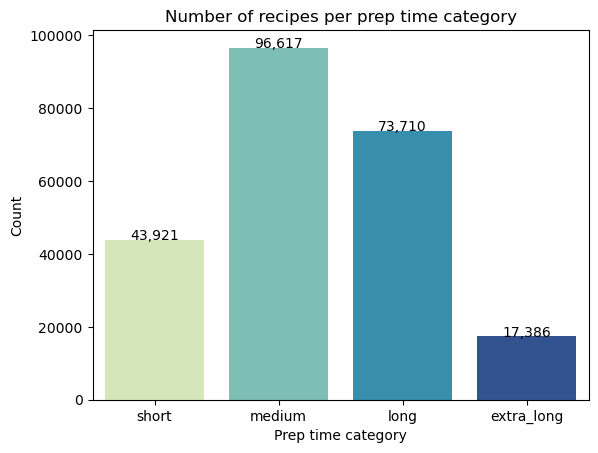

In [22]:
show_recipes_per_preptime_category()

### Show ingredients amount distribution per prep time category (all ingredient frequencies)

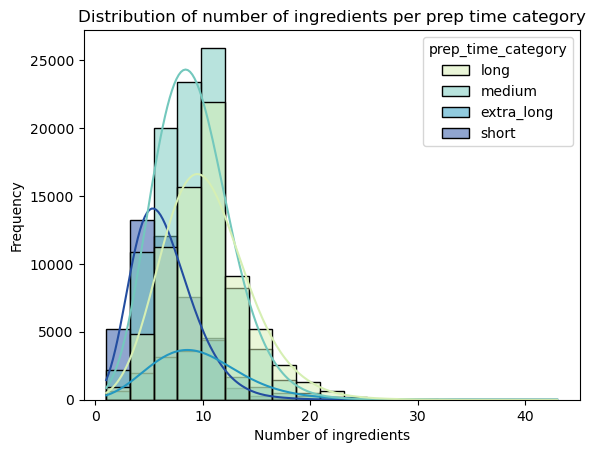

In [23]:
show_num_ingredients_distributions_per_preptime_category()

### Show ingredients amount distribution per prep time category (capped at max 20 inrgedients per recipe)

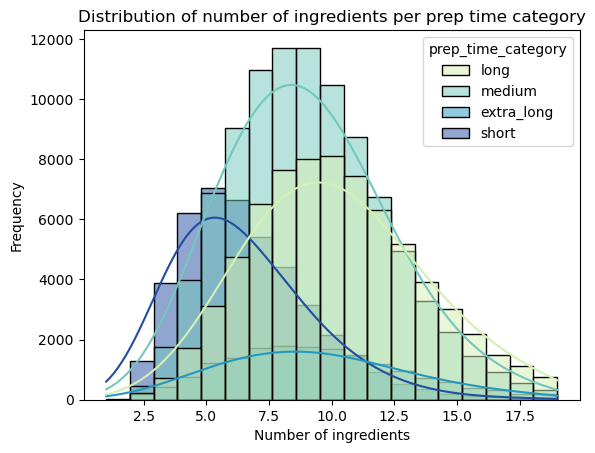

In [24]:
show_num_ingredients_distributions_per_preptime_category(trim=True)

In [25]:
def show_boxplot(data, filter_data):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    subset = data[filter_data]

    for i, col in enumerate(subset.select_dtypes('number')):
        sns.boxplot(data=subset, y=col, ax=ax[i], palette="YlGnBu")

    plt.show()

In [26]:
def remove_outliers_iqr(data, iqr_factor):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    thresh = iqr_factor * iqr
    data = data[~((data < (q1 - thresh)) | (data > (q3 + thresh))).any(axis=1)]

    return data

### Distribution for short and medium prep time recipes

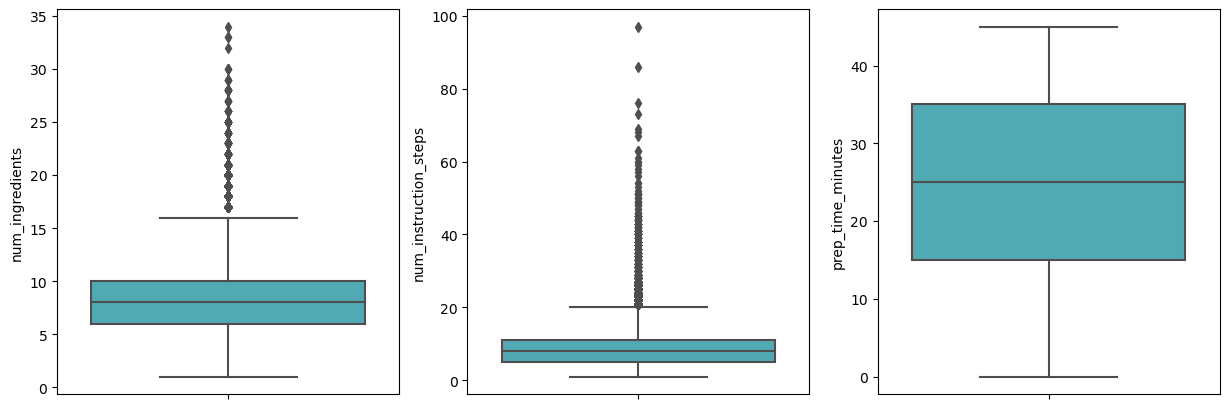

In [27]:
custom_filter = (df['prep_time_category'] == 'short') | (df['prep_time_category'] == 'medium')

show_boxplot(df, custom_filter)

### Remove outliers - for visualization purposes only

In [28]:
df_no_outliers = remove_outliers_iqr(df, 1.5)

In [29]:
df_no_outliers.shape, df.shape

((198176, 11), (231634, 11))

### Distribution for short and medium prep time recipes - outliers removed

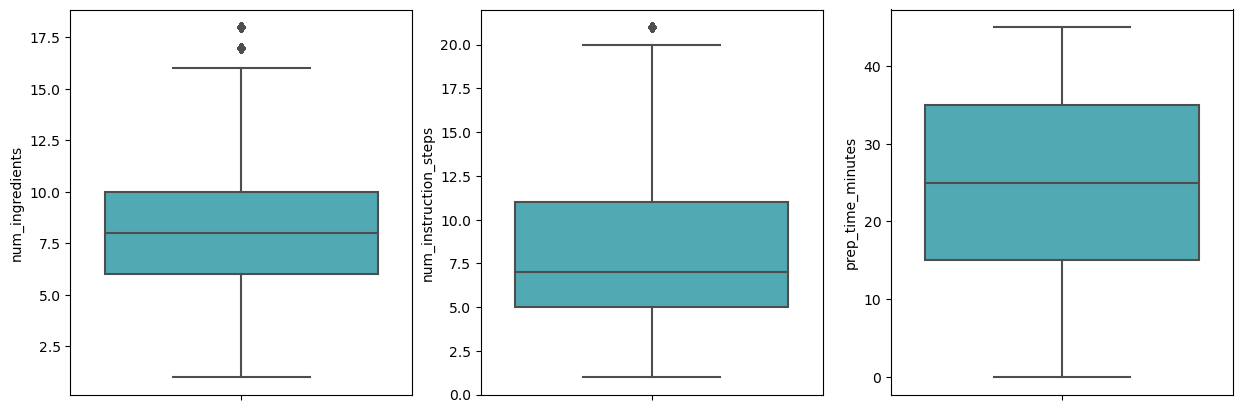

In [30]:
show_boxplot(df_no_outliers, custom_filter)

Observations:
- 50% of recipes for prep time short/medium are having 6 to 10 ingredients
- 50% of recipes for prep time short/medium have 5 to 11 instructions steps
- 50% of recipes in the short/medium cluster have prep times betweene 15 to 35 minutes

Important: **Note that this is for visuialization purposes only - I do not drop the outliers from dataset**

### Check number of ingredients & number of instruction steps  in more details

In [31]:
print('Amount of recipes with ingredients number smaller 2: ', df[df['num_ingredients']<2].shape[0])

Amount of recipes with ingredients number smaller 2:  25


**Explore some examples with ingredient count 1**

In [32]:
df[df['num_ingredients']<2].sample(3)

,source,title,contributor_id,tags,nutrition,ingredients,num_ingredients,instructions,num_instruction_steps,prep_time_minutes,prep_time_category
86040,food.com,freezing eggs,249074,"['60-minutes-or-less', 'time-to-make', 'main-i...","[11.9, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0]",[egg],1,"[items needed:, eggs, ziplock bags , various s...",37,35,medium
148440,food.com,open pesky pistachio nuts,593927,"['15-minutes-or-less', 'time-to-make', 'prepar...","[7.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",[pistachio nut],1,[take the blunt knife and stick it into the en...,4,1,short
6499,food.com,apple cider reduction,171084,"['time-to-make', 'course', 'preparation', 'low...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]",[apple cider],1,"[in 6-8 quart stock pan , measure out 2 cups o...",13,155,long


In [33]:
print('Amount of recipes with instruction steps smaller 2: ', df[df['num_instruction_steps']<2].shape[0])

Amount of recipes with instruction steps smaller 2:  2443


**Explore some examples with instruction steps count 1**

In [34]:
df[df['num_instruction_steps']<2].sample(3)

,source,title,contributor_id,tags,nutrition,ingredients,num_ingredients,instructions,num_instruction_steps,prep_time_minutes,prep_time_category
165760,food.com,prenatal strawberry banana smoothies,505325,"['15-minutes-or-less', 'time-to-make', 'course...","[99.8, 0.0, 59.0, 0.0, 2.0, 0.0, 8.0]","[nonfat vanilla yogurt, frozen strawberries, o...",4,[place all ingredients in a blender and blend ...,1,10,short
208279,food.com,tandoori marinade,266635,"['weeknight', '15-minutes-or-less', 'time-to-m...","[173.9, 13.0, 46.0, 101.0, 19.0, 26.0, 5.0]","[plain yogurt, garlic cloves, fresh ginger, gr...",8,[combine all ingredients and marinate meat and...,1,10,short
169436,food.com,quick tuna spread lower carb,37636,"['15-minutes-or-less', 'time-to-make', 'course...","[161.3, 8.0, 5.0, 20.0, 46.0, 5.0, 1.0]","[tuna in water, mayonnaise, bread and butter p...",4,"[mix and serve on whole grain bread , rolls , ...",1,5,short


In [35]:
print(df.iloc[16767]['instructions'])
print('-----')
print(df.iloc[49437]['instructions'])

['combine all the ingredients in a blender and process until smooth']
-----
['combine in glass and top with chocolate milk']


### Drop samples with one instruction step and samples with only one ingredient 

In [36]:
indexes_to_drop = [*df[df['num_instruction_steps']<2].index, *df[df['num_ingredients']<2].index ]
print(df.shape)
df.drop(index=indexes_to_drop, inplace=True)
print(df.shape)

(231634, 11)
(229166, 11)


## Categorical Features

In [37]:
df.select_dtypes('object').columns

Index(['source', 'title', 'contributor_id', 'tags', 'nutrition', 'ingredients',
       'instructions', 'prep_time_category'],
      dtype='object')

### Check ingredients

In [38]:
ingredients = [item for sublist in df['ingredients'].values for item in sublist]

In [39]:
print('Count ingredients from all recipes', len(ingredients))

Count ingredients from all recipes 2082456


In [40]:
print('Count unique ingredients:', len(set(ingredients)))

Count unique ingredients: 14915


### Create list of unique ingredients and count how many times they appeared in recipes

In [41]:
ingred = pd.Series(ingredients)
df_ingredients = pd.DataFrame()
df_ingredients['ingredient'] = ingred.value_counts().index
df_ingredients['occurence'] = ingred.value_counts().values

In [42]:
df_ingredients.sample(3)

,ingredient,occurence
2383,kernel corn,62
10236,wholemeal rye flour,2
3975,ponzu sauce,24


### Top 25 ingredients from all recipes

In [43]:
df_ingredients.head(25)

,ingredient,occurence
0,salt,85319
1,butter,54881
2,sugar,44261
3,onion,38929
4,water,34741
5,eggs,33729
6,olive oil,32681
7,flour,26238
8,garlic cloves,25671
9,milk,25606


In [44]:
df_ingredients.to_csv('dataset-prepared/df_ingredients.csv')

In [2]:
ing = pd.read_csv('dataset-prepared/df_ingredients.csv')

In [5]:
ing.head(50)

,Unnamed: 0,ingredient,occurence
0,0,salt,85319
1,1,butter,54881
2,2,sugar,44261
3,3,onion,38929
4,4,water,34741
5,5,eggs,33729
6,6,olive oil,32681
7,7,flour,26238
8,8,garlic cloves,25671
9,9,milk,25606


# Preprocessing

In [63]:
def create_combined_entry(row):
    special_token = '<|endoftext|>'
    new_line = '\n'
    
    entry = f"""
    Ingredients:
    {new_line.join(row['ingredients'])}
    Instructions:
    {new_line.join(row['instructions'])}
    {special_token}""" 
    
    return entry

def prepare_data_for_finetuning(data):
    data['combined_set'] = [create_combined_entry(row) for i, row in data.iterrows()]
    
    return data

In [64]:
df_combined = prepare_data_for_finetuning(df)

In [65]:
df_combined.iloc[0]['combined_set']

'\n    Ingredients:\n    winter squash\nmexican seasoning\nmixed spice\nhoney\nbutter\nolive oil\nsalt\n    Instructions:\n    make a choice and proceed with recipe\ndepending on size of squash , cut into half or fourths\nremove seeds\nfor spicy squash , drizzle olive oil or melted butter over each cut squash piece\nseason with mexican seasoning mix ii\nfor sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece\nseason with sweet mexican spice mix\nbake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin\nbe careful not to burn the squash especially if you opt to use sugar or butter\nif you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking\nif desired , season with salt\n    <|endoftext|>'

In [66]:
print(df_combined.iloc[0]['combined_set'])


    Ingredients:
    winter squash
mexican seasoning
mixed spice
honey
butter
olive oil
salt
    Instructions:
    make a choice and proceed with recipe
depending on size of squash , cut into half or fourths
remove seeds
for spicy squash , drizzle olive oil or melted butter over each cut squash piece
season with mexican seasoning mix ii
for sweet squash , drizzle melted honey , butter , grated piloncillo over each cut squash piece
season with sweet mexican spice mix
bake at 350 degrees , again depending on size , for 40 minutes up to an hour , until a fork can easily pierce the skin
be careful not to burn the squash especially if you opt to use sugar or butter
if you feel more comfortable , cover the squash with aluminum foil the first half hour , give or take , of baking
if desired , season with salt
    <|endoftext|>


In [67]:
df_combined.to_pickle('dataset-prepared/df_dataset_prepared.pkl')

## Prepare Data for Fine Tuning

- the data which will be used for fine tuning will only contain the combined set of inrgedients and instruction teps
- first data is shuffeled to have a random ordering
- then the first 200.000 samples are used for train set
- the test set will contain the remaining examples
- note that the is no real concept of measuring the test set with a score, the probing of recepices will have to be done empirically // manually 

In [71]:
data = pd.read_pickle('dataset-prepared/df_dataset_prepared.pkl')

#### Shuffle 

In [73]:
data = data.sample(frac=1).reset_index(drop=True)

#### Create train and test set

In [76]:
data.shape

(229166, 12)

In [77]:
data_train = data[:200_000]['combined_set'].values
data_test = data[200_000:]['combined_set'].values

In [78]:
# save as txt files
with open('dataset-prepared/data_train.txt', 'w') as f:
    f.write('\n'.join(data_train))

with open('dataset-prepared/data_test.txt', 'w') as f:
    f.write('\n'.join(data_test))

In [80]:
data_train

array(['\n    Ingredients:\n    bulgar wheat\nonion\nfresh ground pepper\nsalt\nparsley\ngreen onion\ntomatoes\nfresh lemon juice\nolive oil\n    Instructions:\n    soak bulgur wheat in lukewarm water to cover by 1 / 2 inch for 45 minutes and then place in sieve to drain\ncombine minced onion pepper and salt\nset aside\nin a large bowl , combine parsley , scallions and tomatoes ,\ngently fold in the soaked or rinsed wheat\nstir in seasoned onion and dress with lemon and oil\nadd parsley , scallions and tomatoes ,\nrefrigerate at least an hour before serving\nserve on lettuce leaves in individual dishes , or use tender lettuce heart leaves as scoops to eat the tabbouleh\nin lebanon tabouleh is generally served on a large platter and decorated with chopped tomatoes\nthe vegetable leaves are served on a separate dish in an attractive way\ni usually have a basket of mini pitas that we spoon our tabouleh on\n    <|endoftext|>',
       '\n    Ingredients:\n    sea scallops\nbutter\nshallots\

In [3]:
data_1 = pd.read_pickle('dataset-prepared/df_dataset_prepared.pkl')

In [4]:
data_1.to_csv('dataset-prepared/df_dataset_prepared.csv')

In [84]:
df_random_test_recipes = data_1[['title', 'combined_set']]

In [ ]:
temp = "Ingredients:
    oil
onion
garlic cloves
green chili pepper
salt
turmeric
coriander
ground cumin
ground black pepper
cinnamon
cardamom pods
whole cloves
water
chicken pieces
basmati rice
cashews
    Instructions:
    saute garlic , onion , and pepper in oil over medium heat until browned
add salt , turmeric , coriander , cumin , black pepper , cinnamon , cardamom , cloves to onion mixture
add chicken and cook until brown on the outside
add water and cook the chicken on medium heat for about 20-30 minutes if using a pressure cooker , or longer if cooking in a regular pot
when the chicken is cooked through , assess how much water is left in the pot
you will want about 2 cups of water for every cup of rice , however this may vary greatly depending on the type of rice used as some are more absorbent
add the rice to the broth , and the rice should be just covered by the water
if needed add more water a quarter cup at a time
cook the rice uncovered on medium heat for about 10 minutes , until the rice is about 2 / 3 cooked through and there is just a little bit of liquid left
now reduce the heat to low and cover the pot , do not seal the cooker
let the rice steam for another 10 minutes until all liquid is absorbed
when all water is absorbed and rice is cooked through , turn off heat and let sit in the pot about 10 minutes before serving
garnish with a handful of raisins , almonds , and cashews
    <|endoftext|>"

In [131]:
res = df_random_test_recipes.loc[df_random_test_recipes['combined_set']. \
                                 str.contains('arrange the tomatoes on top of cheese in a circular pattern')]




In [132]:
res

,title,combined_set
72021,dijon cheese pie,\n Ingredients:\n pie crust\ndijon musta...


In [133]:
selection = ['chicken zurbian rice from yemen', 'crock pot turkey joes', 'delta catfish stew', 
            'super fudgy truffles', 'spaghetti with vegetables', 'azumaya egg rolls', 'strawberry roll cake',
            'bacon and cheese souffles', 'asparagus in orange sauce', 'confetti rolls', 'smoked sausage supper', 
             'browned pork chops and gravy', 'veggie pita subs', 'blueberry orange pancakes', 
             'breaded southern fried pork chops',
            'penne pasta with vegetables', 'baked macaroni and cheese with broccoli', 'dijon cheese pie']

chicken zurbian rice from yemen, crock pot turkey joes	66587, delta catfish stew 71251, super fudgy truffles 204240, spaghetti with vegetables 193696, 11772 azumaya egg rolls, strawberry roll cake 201268, bacon and cheese souffles 12249, asparagus in orange sauce 9817, confetti rolls 57164, smoked sausage supper 189891, 	browned pork chops and gravy 30427, veggie pita subs 222527, blueberry orange pancakes 26209, breaded southern fried pork chops 28340,  penne pasta with vegetables 157348, baked macaroni and cheese with broccoli 14529, dijon cheese pie 72021

In [134]:
df_test = df[df_random_test_recipes['title'].isin(selection)]

In [136]:
df_test.shape

(18, 12)